# Анализ данных о пассажирах Титаника

In [18]:
%pylab inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Обзор данных

Чтение набора данных

In [56]:
t = pd.read_csv('train.csv', header=0)

Отображение данных

In [94]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [95]:
t.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

###Подготовка данных:

Для работы с данными используем pandas и DataFrame как класс, выступающий в роли таблицы.
Выборка содержит 891 пассажира. Причём, некоторые признаки объектов не известны. По ходу мере необходимости при анализе будем удалять из рассмотрения объекты с пропусками. Создадим также для анализа таблицу, в которой удалим все объекты с хотя бы одним пропущенным признаком. Причем в столбцах Cabin много пропусков, поэтому удалим этот столбец из рассмотрения. Использовать в анализе будем в основном изначальный объект t.

In [91]:
tf = t.drop('Cabin', axis=1)
tf = tf.dropna()
tf.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

В полученной выборке 712 объектов.

# Анализ данных

1\. Рассмотрим статистику пассажиров по классам.

In [127]:
fc = sum(t.Pclass == 1)
print fc, "человек"
print fc / float(len(t)) * 100, "% от общего количества"

216 человек
24.2424242424 % от общего количества


Первым классом ехало 216 человек. Это 24% от общего количества человек.

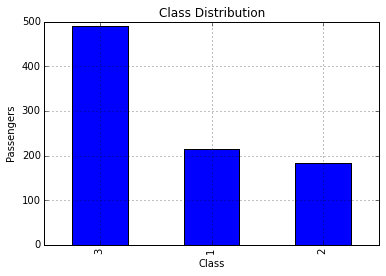

In [549]:
t.Pclass.value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel('Class')
plt.ylabel('Passengers')

2\. Приступим к изучению возраста пассажиров. Для анализа возрастов подготовим данные, а именно, удалим пустые значения

In [150]:
age = t.Age.dropna()

Все возраста являются значением из следующего массива. Всего 88 различных возрастов:

In [217]:
uage = np.unique(age)
uagec = len(uage)
print uage
print uagec, "unique ages"

[  0.42   0.67   0.75   0.83   0.92   1.     2.     3.     4.     5.     6.
   7.     8.     9.    10.    11.    12.    13.    14.    14.5   15.    16.
  17.    18.    19.    20.    20.5   21.    22.    23.    23.5   24.    24.5
  25.    26.    27.    28.    28.5   29.    30.    30.5   31.    32.    32.5
  33.    34.    34.5   35.    36.    36.5   37.    38.    39.    40.    40.5
  41.    42.    43.    44.    45.    45.5   46.    47.    48.    49.    50.
  51.    52.    53.    54.    55.    55.5   56.    57.    58.    59.    60.
  61.    62.    63.    64.    65.    66.    70.    70.5   71.    74.    80.  ]
88 unique ages


Распределение возрастов следующее:

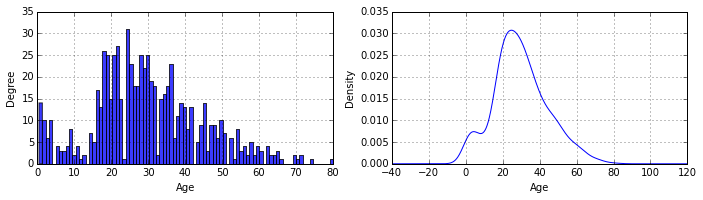

In [374]:
fig = plt.figure(figsize=(18,6), dpi=1600)
ax1 = plt.subplot2grid((2,3), (0,0))
age.plot(kind='hist', bins=uagec,alpha=0.77)
plt.xlabel('Age')
ax2 = plt.subplot2grid((2,3), (0,1))
age.plot(kind='kde')
plt.xlabel('Age')

Приведем статистику по возрастам. Вся выборка - 714 человек, средний возраст - 29.7 лет, дисперсия - 14.52, медиана - 28 лет, минимальный возраст - 0.42 года, максимальный - 80 лет.

In [249]:
print age.describe()
print age.median()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
28.0


3\. Рассмотрим распределение детей по классам

In [264]:
c = t[t.Age < 18]
print len(c), " - всего детей\n", float(len(c)) / len(t) * 100, "% от общего количества"

113  - всего детей
12.682379349 % от общего количества


Как видно из расчетов всего 113 детей (12.68% от общего количества)

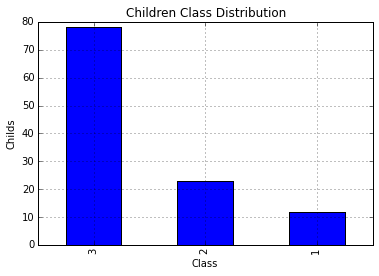

In [551]:
c.Pclass.value_counts().plot(kind='bar')
plt.title("Children Class Distribution")
plt.xlabel('Class')
plt.ylabel('Childs')

4\. Выясним, как коррелирует число братьев/сестер с числом родителей/детей

In [269]:
corr = np.corrcoef(t.SibSp, t.Parch)
print corr[0,1]

0.41483769862


Вывод: корреляция слабая

5\. Рассмотрим самые популярные имена на корабле. Для этого для простоты и без потери качества анализа выберем имя как второе слово после запятой в полном имени пассажира.

In [333]:
names = [name.split(',')[1].split()[1] for name in t.Name]
unique,pos = np.unique(names, return_inverse=True)
counts = np.bincount(pos)
maxsort = counts.argsort()[::-1]
names = unique[maxsort]
counts = counts[maxsort]
print names[0:5], counts[0:5]

['William' 'John' 'Thomas' 'George' 'Charles'] [48 31 19 16 16]


Самые популярные имена в порядке убывания: William, John, Thomas, George, Charles. Соответственно их частоты: 48, 31, 19, 16, 16.

6\. Как изменяется цена на билет?

In [456]:
print t.Fare.describe()
print t.Fare.median()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
14.4542


Средняя цена равна 32.20, причём отклонение от среднего составляет 49.69, минимальная цена - 0, максимальная - 512.33, медиана - 14.45.

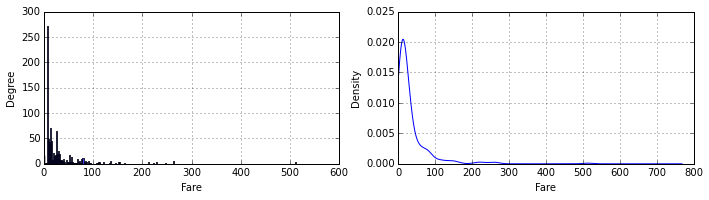

In [343]:
fig = plt.figure(figsize=(18,6), dpi=1600)
ax1 = plt.subplot2grid((2,3), (0,0))
t.Fare.plot(kind='hist', bins=len(np.unique(t.Fare)),alpha=0.77)
plt.xlabel('Fare')
ax2 = plt.subplot2grid((2,3), (0,1))
t.Fare.plot(kind='kde')
ax2.set_xlim(left=0)
plt.xlabel('Fare')

In [356]:
unique,pos = np.unique(t.Fare.values, return_inverse=True)
counts = np.bincount(pos)
maxsort = counts.argsort()[::-1]
fare = unique[maxsort]
counts = counts[maxsort]
print fare[0:5], "\n", counts[0:5]



[  8.05    13.       7.8958   7.75    26.    ] 
[43 42 38 34 31]


Самые популярные билеты стоили 8.05, 13, 7.8958, 7.75, 26 и соответственно их частоты 43, 42, 38, 34, 31. 

7\. Рассмотрим титулы пассажиров. Все титулы: 'Capt.', 'Col.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.', 'Sir.', 'the Countess.'.

In [364]:
names = [name.split(',')[1].split()[0] for name in t.Name]
names = np.unique(names)
print names

['Capt.' 'Col.' 'Don.' 'Dr.' 'Jonkheer.' 'Lady.' 'Major.' 'Master.' 'Miss.'
 'Mlle.' 'Mme.' 'Mr.' 'Mrs.' 'Ms.' 'Rev.' 'Sir.' 'the']


In [372]:
def titles(p):
    names = [name.split(',')[1].split()[0] for name in p.Name]
    names = np.unique(names)
    print names

titles(t[t.Pclass == 1])
titles(t[t.Pclass == 2])
titles(t[t.Pclass == 3])

['Capt.' 'Col.' 'Don.' 'Dr.' 'Jonkheer.' 'Lady.' 'Major.' 'Master.' 'Miss.'
 'Mlle.' 'Mme.' 'Mr.' 'Mrs.' 'Sir.' 'the']
['Dr.' 'Master.' 'Miss.' 'Mr.' 'Mrs.' 'Ms.' 'Rev.']
['Master.' 'Miss.' 'Mr.' 'Mrs.']


Титулы из первого класса: 'Capt.', 'Col.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Sir.' 'the Countess.'.

Второй класс: 'Dr.', 'Master.', 'Miss.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.'.

Третий класс: 'Master.', 'Miss.', 'Mr.', 'Mrs.'.


8\. Узнаем, существует ли зависимость между классом и номером билета. Как в 4 посчитать корреляцию сразу нельзя, потому что номер билета вообще говоря строка. Сделаем допущение и оставим только те объекты, номер билета которого число. Получим корреляцию 0.28, которая говорит о слабой зависимости класса и номера билета.

In [423]:
ticket = t[t.Ticket.str.contains('^[^A-Z]')]
ticket[['Ticket']] = ticket[['Ticket']].astype(int)
corr = np.corrcoef(ticket.Pclass, ticket.Ticket)
print corr[0,1]

0.275150696724


9\. Интересует вопрос, какой части пассажиров удалось выжить.

In [435]:
surv = sum(t.Survived == 1)
print surv, "пассажира\n", float(surv) / len(t) * 100, "%"

342 пассажира
38.3838383838 %


В жестоких условиях удалось спастись только 342 пассажирам, что является 38.38% от общего их числа

#Поиск закономерностей

1\. Оказывается, что женщины выживали чаще мужчин.

In [453]:
male = t[t.Sex == 'male']
malec = len(male)
malecs = len(male[male.Survived == 1])
print malecs, "мужчин выжило\n", malecs / float(malec) * 100 , "% от всех мужчин\n", malecs / float(len(t)) * 100, "% от всех"
female = t[t.Sex == 'female']
femalec = len(female)
femalecs = len(female[female.Survived == 1])
print femalecs, "женщин выжило\n", femalecs / float(femalec) * 100 , "% от всех женщин\n", femalecs / float(len(t)) * 100, "% от всех"

109 мужчин выжило
18.8908145581 % от всех мужчин
12.2334455668 % от всех
233 женщин выжило
74.2038216561 % от всех женщин
26.1503928171 % от всех


Получаем 74.2% выжило женщин (12% от всех пассажиров), 18.9% мужчин выжило (26% от всех пассажиров).

2\. Cреди пассажиров с более дорогими билетами процент выживших выше.

In [460]:
mf = t.Fare.median()
rich = t[t.Fare > mf]
print float(sum(rich.Survived == 1)) / len(rich) * 100, "% от всех пассажиров с ценой билета больше медианы выжило"

poor = t[t.Fare < mf]
print float(sum(poor.Survived == 1)) / len(poor) * 100, "% от всех пассажиров с ценой билета меньше медианы выжило"

51.8018018018 % от всех пассажиров с ценой билета больше медианы выжило
25.2272727273 % от всех пассажиров с ценой билета меньше медианы выжило


В половине, у которой цена билета была больше медианного значения, выжило 52%. В оставшейся половине - 25%. Три пассажира с самыми дорогими билетами выжили. Из тех 15, кто купил самые дешевые билеты, 1 выжил. 

3\. Нужно найти закономерности, точно описывающие группу выживших пассажиров.

In [523]:
surv = t[t.Survived == 1]
survc = len(surv)
print survc, len(surv[surv.Age == 80])

342 1


Наиболее сложно искать закономерности, под которую попадает группа состоящая из многих пассажиров. Например, перебирая все признаки, такие как возраст, тип класса, цена за билет мы обнаружим, что наша группа попадает под граничные условия этих признаков. Поэтому стоит искать группу менньшую, но с более сильными ограничениями, например, взять в рассмотрение только девушек. И рассмотреть группу девушек с суммой билета больше 153.4625. Логично, что все девушки выжили с такой минимальной ценой билета ибо их первыми сажали на борт.

In [537]:
surv = t[t.Fare >= 153.4625]
surv = surv[t.Sex == "female"]
print float(sum(surv.Survived == 1)) / len(surv)

1.0


In [546]:
surv = t[t.Age < 2]
surv = surv[t.Sex == "female"]
print float(sum(surv.Survived == 1)) / len(surv)

1.0


Последний пример показывает, что всех детей до 2-х лет женского пола удалось спасти. Закономерности искать довольно сложно, опираясь только на эмпирический опыт.